In [1]:
import sys

from __future__ import print_function, division

In [2]:
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import  optimizers

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import tensorflow


Using TensorFlow backend.


In [3]:
print("Keras " , keras.__version__)
print("tensorflow, ", tensorflow.__version__)
print("python", sys.version)

Keras  2.0.5
tensorflow,  1.2.1
python 3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [4]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [6]:
# updatable plot
# a minimal example (sort of)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [7]:
# just logistic regression, to keep it simple and fast

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.00))
model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(Dropout(0.00))
model.add(Dense(50, activation='relu', input_shape=(50,)))
model.add(Dropout(0.00))
model.add(Dense(10, activation='sigmoid', input_shape=(50,)))

sgd = optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

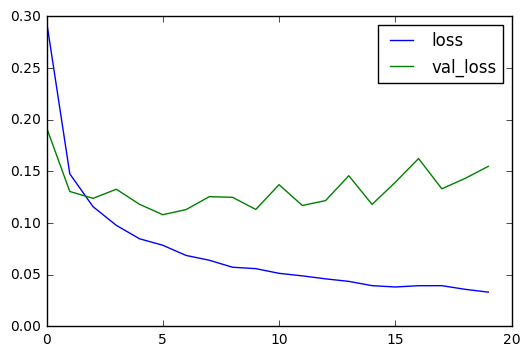

In [8]:
# in this static viewer it is not obvious,
# but this plot grows step by step

model.fit(X_train, Y_train,
          epochs=20,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)